## The dataset I used for this creative programming assignment is about NBA players and their corresponding teams, jersey numbers, positions, ages, heights, etc. 

## The url for this dataset is: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

### Questions that I am curious about this dataset: 
### 1. Which NBA team spent most money in their players? 2. Which position in the NBA can earn the most on average? 

In [1]:
# part b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('nba.csv')

df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [2]:
#part c 
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [3]:
#part d1:
df.columns.tolist()

['Name',
 'Team',
 'Number',
 'Position',
 'Age',
 'Height',
 'Weight',
 'College',
 'Salary']

In [4]:
print(df.index)

RangeIndex(start=0, stop=458, step=1)


In [5]:
table = pd.pivot_table(df, values = 'Salary', index = ['Team'], aggfunc = np.sum, fill_value=0)

sorted_table_salary = table.sort_values(by = 'Salary', ascending=False)
sorted_table_salary.head()

,Salary
Team,
Cleveland Cavaliers,106988689
Los Angeles Clippers,94854640
Oklahoma City Thunder,93765298
Golden State Warriors,88868997
Chicago Bulls,86783378


In [6]:
sorted_table_salary.tail()

,Salary
Team,
Minnesota Timberwolves,59709697
Boston Celtics,58541068
Brooklyn Nets,52528475
Portland Trail Blazers,48301818
Philadelphia 76ers,30992894


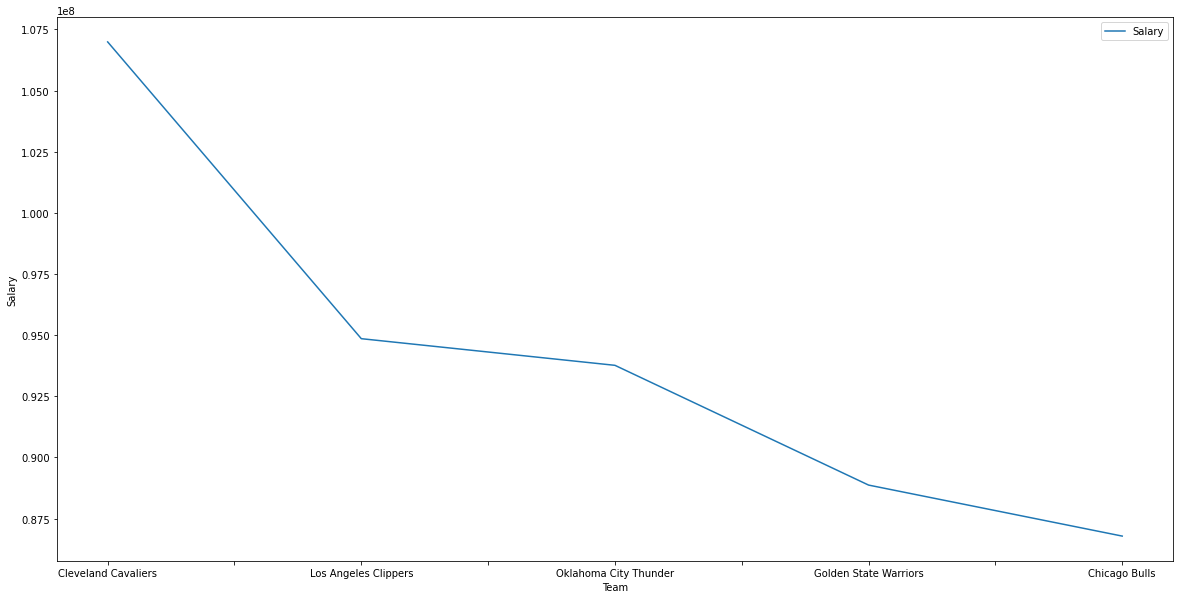

In [7]:
ax = sorted_table_salary.head().plot(ylabel='Salary', figsize=(20,10))

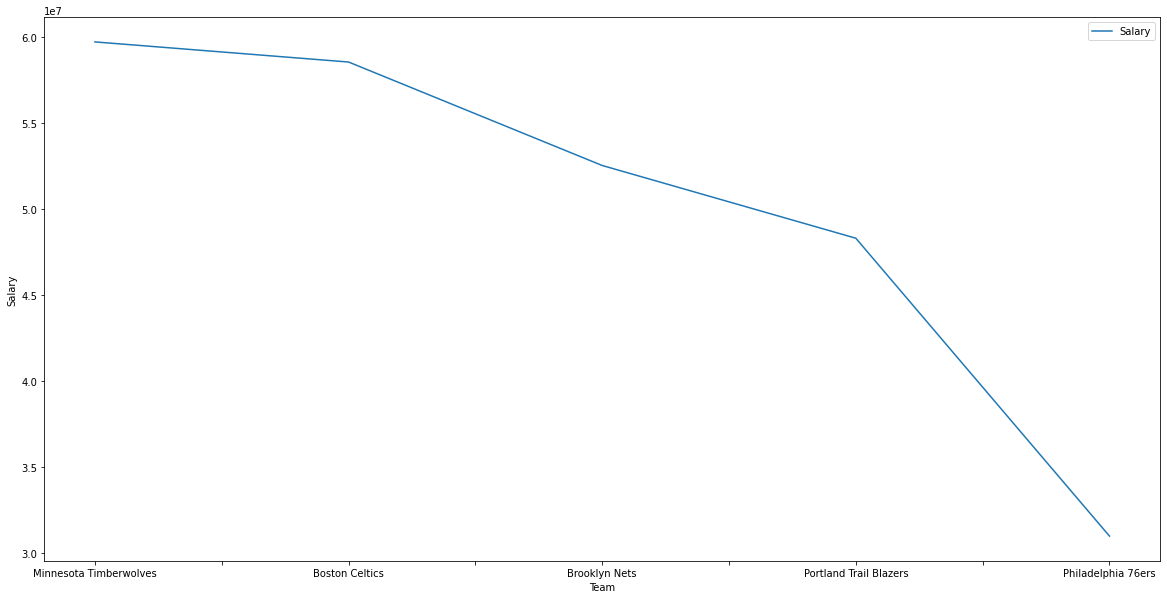

In [8]:
# Last five
ax2 = sorted_table_salary.tail().plot(ylabel='Salary', figsize=(20,10))

In [9]:
table_new = pd.pivot_table(df, values = 'Salary', index = ['Team'], columns = ['Position'], aggfunc = np.sum, fill_value=0)

table_new.head()

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,22756250,23952268,9763400,6000000,10431032
Boston Celtics,7351395,18170960,19898606,6796117,6323990
Brooklyn Nets,20636276,14304819,8747276,0,8840104
Charlotte Hornets,20316720,14057310,14328455,6331404,23307031
Chicago Bulls,20848760,16805037,22343064,3916320,22870197


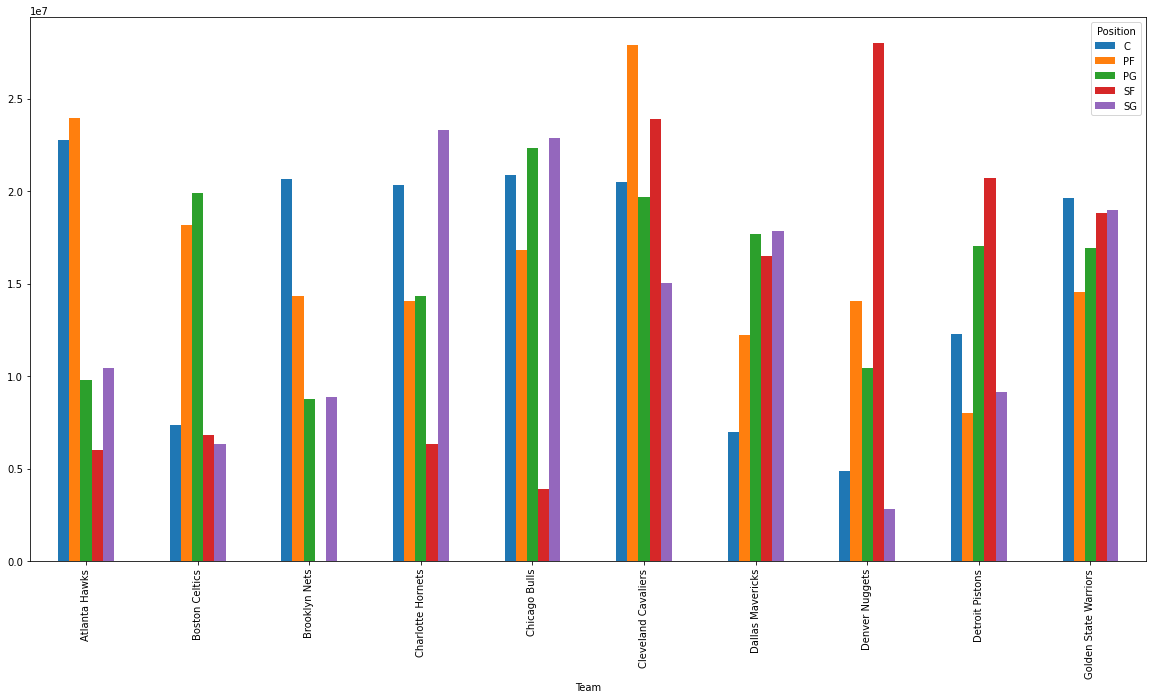

In [10]:
# We can also examine the salaries for each positions on each team
ax = table_new.head(10).plot(kind='bar', label='Salary', figsize=(20,10))

In [11]:
# groupby
group_table = df.groupby('Position')['Salary'].mean()

group_table

Position
C     5.967052e+06
PF    4.562483e+06
PG    5.077829e+06
SF    4.857393e+06
SG    4.009861e+06
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Position'>

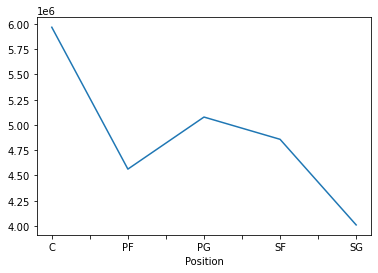

In [12]:
group_table.plot(label='Salary')

## Discussion Cell

This dataset has 458 rows (players) and 9 features. 

## Question 1: Which NBA team spent most money in their players?
According to the analysis on this dataset, we can conclude that the Cleveland Cavaliers spent the most on their players, with a total of near \\$107 million dollars. The Los Angeles Clippers and Oklahoma City Thunder were ranked the second and the third, with a total of $94.9 million dollars and \\$93.8 million dollars repectively. On the other end, Philadelphia 76ers and Portland Trail Blazers spent the least, with a total of \\$31.0 million dollars and \\$48.3 million dollars

## Question 2: Which position in the NBA can earn the most on average? 
Also, throughout the NBA league, centers (C) made the most on average, with an average of \\$6 miliion dollars, and shooting guards (SG) made the least, with an average of \\$4.01 million dollars..